In [1]:
names=["espalda0","bicep0","triceps0","pecho0","espalda1","bicep1","triceps1","pecho1"]
classes=[0,1,2,3,0,1,2,3]

name_classes=["espalda","bicep","triceps","pecho"]
incT=50
incT2=incT*5

winIndSize=list(range(-39,1,1))

print(winIndSize, "#", len(winIndSize))



[-39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0] # 40


In [2]:
import numpy as np
from pandas import read_csv    

import time

from datetime import datetime
from numpy import mean



X=[]
Y=[]
Z=[]
L=[]
TT=[]
C=[]




incT0=0
N=0
for iname,name in enumerate(names):
    
    
    series=read_csv(name+".tsv", sep="\t",parse_dates=False)
    Ylabel=read_csv(name+".L.tsv", sep="\t",parse_dates=False)

    print(series.values)
            
    TY=np.array(Ylabel["timestamp"])
    LY=np.array(Ylabel["label"])

    print("TL0:",TY)
    print("LY0:",LY)


    lastT=-1
    for i in range(0,len(TY)):
        if(LY[i]==0 or LY[i]==-1):
            TY[i]=TY[i]+lastT
            lastT=TY[i]
        if(LY[i]==1):
            lastT=TY[i]
        if(LY[i]==-1):
            lastT=-1

    print("TL:",TY)
    print("LY:",LY)

    T=np.array(series["timestamp"])

    t0=T[0]
    tY0=TY[0]
    tN=T[-1]
    print(t0,tN)

    tY0=int(tY0/incT)*incT
    t0=int(t0/incT)*incT
    tN=int(tN/incT)*incT

    print("TIMES:",t0,tN, (int)(tN-t0)/1000)


    v0=0
    sesion=False
    for ti in range(t0,tN,incT2):
        print("ti:",ti, ti-t0)

        i=np.where( (TY>=ti-t0) & (TY<=ti+incT-t0))
        print("i2:",i[0], "LY:",LY[i[0]])

        if(len(i[0])>0):
            l=LY[i[0][0]]
            if(l==1):
                v0=0
                sesion=True
            if(l==-1):
                v0=0
                sesion=False    
            if(l==0):
                v0=0


        if(sesion):
            v0=v0+0.01
            print("v0:",v0)
            L.append(v0)
        else:
            L.append(-1)


        i=np.where( (T>=ti) & (T<=ti+incT))
        print(i)
        print(series.values[i])

        x0=mean(series.values[i][:,0])
        y0=mean(series.values[i][:,1])
        z0=mean(series.values[i][:,2])
        
        print("x0",x0,"y0",y0,"z0",z0)
        #print("X",X,"Y",Y,"Z",Z)

        if(sesion):
            X.append(x0)
            Z.append(z0)
            Y.append(y0)         
        else:
            X.append(x0)
            Z.append(z0)     
            Y.append(y0)         
        #print(x0,y0,z0)    



        TT.append(ti-t0+incT0)
        C.append(classes[iname])
        N=N+1
    incT0=incT0+ti-t0

[[ 7.00000000e-01  3.90000000e+00  7.50000000e+00  1.68840200e+12]
 [ 1.20000000e+00  5.50000000e+00  7.70000000e+00  1.68840200e+12]
 [ 1.80000000e+00  5.50000000e+00  8.20000000e+00  1.68840200e+12]
 ...
 [-6.00000000e-01 -3.40000000e+00  8.70000000e+00  1.68840219e+12]
 [-7.00000000e-01 -3.10000000e+00  9.20000000e+00  1.68840219e+12]
 [-1.40000000e+00 -1.30000000e+00  1.00000000e+01  1.68840219e+12]]
TL0: [ 29500   2500   2500   2000   2000   2500   2000   2000   2000   2500
   2500    500  67000   3000   2500   2000   2000   2500   2000   2000
   2000   2500   2000    500 107000   3000   2500   2000   2000   2500
   2000   2000   2000   2500   2000    500 151500   3000   2500   2000
   2000   2500   2000   2000   2500   2000   2000    500]
LY0: [ 1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0 -1
  1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0 -1]
TL: [ 29500  32000  34500  36500  38500  41000  43000  45000  47000  49500
  52000  52500  67

x0 7.4 y0 -5.6 z0 1.0
ti: 1688402150300 146250
i2: [] LY: []
(array([7312, 7313, 7314], dtype=int64),)
[[ 9.50000000e+00 -4.60000000e+00  8.00000000e-01  1.68840215e+12]
 [ 1.04000000e+01 -6.50000000e+00  4.00000000e-01  1.68840215e+12]
 [ 1.00000000e+01 -6.20000000e+00  1.10000000e+00  1.68840215e+12]]
x0 9.966666666666667 y0 -5.766666666666667 z0 0.7666666666666667
ti: 1688402150550 146500
i2: [] LY: []
(array([7325, 7326], dtype=int64),)
[[ 9.70000000e+00 -3.50000000e+00  3.00000000e-01  1.68840215e+12]
 [ 1.02000000e+01 -4.00000000e+00  1.00000000e-01  1.68840215e+12]]
x0 9.95 y0 -3.75 z0 0.2
ti: 1688402150800 146750
i2: [] LY: []
(array([7337, 7338, 7339], dtype=int64),)
[[ 7.50000000e+00 -5.50000000e+00  1.40000000e+00  1.68840215e+12]
 [ 7.50000000e+00 -5.00000000e+00  1.60000000e+00  1.68840215e+12]
 [ 7.50000000e+00 -4.00000000e+00  1.10000000e+00  1.68840215e+12]]
x0 7.5 y0 -4.833333333333333 z0 1.3666666666666665
ti: 1688402151050 147000
i2: [] LY: []
(array([7350, 7351], dt

x0 -0.7333333333333334 y0 -2.2333333333333334 z0 -8.433333333333332
ti: 1687877773950 92750
i2: [] LY: []
v0: 0.09999999999999999
(array([4637, 4638], dtype=int64),)
[[-6.50000000e+00 -0.00000000e+00 -2.50000000e+00  1.68787777e+12]
 [-6.40000000e+00 -8.00000000e-01 -2.70000000e+00  1.68787777e+12]]
x0 -6.45 y0 -0.4 z0 -2.6
ti: 1687877774200 93000
i2: [22] LY: [0]
v0: 0.01
(array([4649, 4650, 4651], dtype=int64),)
[[-1.10000000e+01  4.00000000e-01  5.00000000e-01  1.68787777e+12]
 [-9.60000000e+00  3.00000000e-01  1.00000000e-01  1.68787777e+12]
 [-9.70000000e+00  7.00000000e-01  3.00000000e-01  1.68787777e+12]]
x0 -10.1 y0 0.4666666666666666 z0 0.3
ti: 1687877774450 93250
i2: [] LY: []
v0: 0.02
(array([4662, 4663], dtype=int64),)
[[-9.30000000e+00  9.00000000e-01  1.90000000e+00  1.68787777e+12]
 [-8.90000000e+00  7.00000000e-01  1.70000000e+00  1.68787777e+12]]
x0 -9.100000000000001 y0 0.8 z0 1.7999999999999998
ti: 1687877774700 93500
i2: [23] LY: [-1]
(array([4674, 4675, 4676], dtyp

(array([1112, 1113, 1114], dtype=int64),)
[[ 2.00000000e+00 -7.60000000e+00 -2.50000000e+00  1.68839921e+12]
 [-4.00000000e-01 -1.12000000e+01 -2.80000000e+00  1.68839921e+12]
 [-2.00000000e-01 -1.14000000e+01 -1.10000000e+00  1.68839921e+12]]
x0 0.46666666666666673 y0 -10.066666666666665 z0 -2.1333333333333333
ti: 1688399214900 22500
i2: [] LY: []
(array([1124, 1125, 1126], dtype=int64),)
[[-0.00000000e+00 -1.30000000e+01  7.00000000e-01  1.68839921e+12]
 [-2.20000000e+00 -6.30000000e+00 -4.00000000e-01  1.68839921e+12]
 [-9.00000000e-01 -6.00000000e+00 -2.30000000e+00  1.68839921e+12]]
x0 -1.0333333333333334 y0 -8.433333333333334 z0 -0.6666666666666666
ti: 1688399215150 22750
i2: [] LY: []
(array([1137, 1138, 1139], dtype=int64),)
[[-2.30000000e+00 -4.00000000e-01 -4.00000000e-01  1.68839922e+12]
 [-1.50000000e+00 -2.00000000e-01  2.00000000e-01  1.68839922e+12]
 [-1.60000000e+00 -1.30000000e+00  1.20000000e+00  1.68839922e+12]]
x0 -1.8 y0 -0.6333333333333334 z0 0.3333333333333333
ti

x0 5.066666666666667 y0 8.966666666666667 z0 -1.6000000000000003
ti: 1688399354900 162500
i2: [] LY: []
v0: 0.10999999999999999
(array([8124, 8125, 8126], dtype=int64),)
[[ 4.40000000e+00  6.80000000e+00 -2.30000000e+00  1.68839935e+12]
 [ 4.20000000e+00  7.40000000e+00 -2.00000000e+00  1.68839935e+12]
 [ 4.10000000e+00  7.60000000e+00 -2.20000000e+00  1.68839935e+12]]
x0 4.233333333333333 y0 7.266666666666666 z0 -2.1666666666666665
ti: 1688399355150 162750
i2: [] LY: []
v0: 0.11999999999999998
(array([8137, 8138, 8139], dtype=int64),)
[[ 5.50000000e+00  1.02000000e+01 -3.20000000e+00  1.68839936e+12]
 [ 5.00000000e+00  1.10000000e+01 -2.40000000e+00  1.68839936e+12]
 [ 4.80000000e+00  1.07000000e+01 -1.90000000e+00  1.68839936e+12]]
x0 5.1000000000000005 y0 10.633333333333333 z0 -2.5
ti: 1688399355400 163000
i2: [] LY: []
v0: 0.12999999999999998
(array([8149, 8150, 8151], dtype=int64),)
[[3.00000000e+00 1.07000000e+01 2.00000000e-01 1.68839936e+12]
 [2.30000000e+00 1.15000000e+01 3.00

x0 -6.3 y0 -8.566666666666666 z0 -3.1333333333333333
ti: 1688576406400 112500
i2: [] LY: []
v0: 0.05
(array([5624, 5625], dtype=int64),)
[[-7.30000000e+00  7.00000000e-01 -1.60000000e+00  1.68857641e+12]
 [-6.70000000e+00  1.30000000e+00 -1.40000000e+00  1.68857641e+12]]
x0 -7.0 y0 1.0 z0 -1.5
ti: 1688576406650 112750
i2: [] LY: []
v0: 0.060000000000000005
(array([5636, 5637, 5638], dtype=int64),)
[[-8.70000000e+00  5.30000000e+00 -1.80000000e+00  1.68857641e+12]
 [-7.90000000e+00  3.60000000e+00 -2.40000000e+00  1.68857641e+12]
 [-7.30000000e+00  3.70000000e+00 -2.70000000e+00  1.68857641e+12]]
x0 -7.966666666666668 y0 4.2 z0 -2.3000000000000003
ti: 1688576406900 113000
i2: [] LY: []
v0: 0.07
(array([5649, 5650], dtype=int64),)
[[-9.00000000e+00  3.50000000e+00 -3.30000000e+00  1.68857641e+12]
 [-9.20000000e+00  3.10000000e+00 -3.10000000e+00  1.68857641e+12]]
x0 -9.1 y0 3.3 z0 -3.2
ti: 1688576407150 113250
i2: [] LY: []
v0: 0.08
(array([5661, 5662, 5663], dtype=int64),)
[[-8.60000000

[[ 5.20000000e+00 -2.00000000e-01  9.80000000e+00  1.68867978e+12]
 [ 4.60000000e+00 -1.30000000e+00  9.70000000e+00  1.68867978e+12]
 [ 3.20000000e+00 -1.30000000e+00  9.20000000e+00  1.68867978e+12]
 ...
 [ 1.37000000e+01 -4.10000000e+00  1.50000000e+00  1.68868018e+12]
 [ 1.27000000e+01 -3.40000000e+00  6.00000000e-01  1.68868018e+12]
 [ 1.16000000e+01 -4.80000000e+00 -1.00000000e+00  1.68868018e+12]]
TL0: [ 11100   1500   1500   1500   1500   1500   1500   1500   1500   1500
   1500    500  38600   1500   1500   1500   1400   1400   1400   1400
   1400   1500   1500    500  67600   1500   1500   1600   1600   1600
   1600   1600   1600   1600   1600    500 101700   1600   1600   1600
   1600   1600   1600   1600   1600   1600   1600    500 131300   1600
   1600   1500   1500   1400   1400   1600   1600   1600   1600    500
 163700   1600   1600   1500   1500   1700   1700   1700   1700   1600
   1500    500 194300   1600   1600   1500   1500   1600   1600   1600
   1500   1500   15

[[ 1.27000000e+01 -1.70000000e+00  2.00000000e+00  1.68867991e+12]
 [ 1.35000000e+01 -1.00000000e-01  2.30000000e+00  1.68867991e+12]]
x0 13.1 y0 -0.9 z0 2.15
ti: 1688679908250 128750
i2: [] LY: []
(array([6436, 6437, 6438], dtype=int64),)
[[ 1.04000000e+01 -2.30000000e+00  2.20000000e+00  1.68867991e+12]
 [ 9.50000000e+00 -2.30000000e+00  2.60000000e+00  1.68867991e+12]
 [ 8.50000000e+00 -2.70000000e+00  2.10000000e+00  1.68867991e+12]]
x0 9.466666666666667 y0 -2.433333333333333 z0 2.3000000000000003
ti: 1688679908500 129000
i2: [] LY: []
(array([6449, 6450], dtype=int64),)
[[ 8.50000000e+00 -7.90000000e+00 -9.00000000e-01  1.68867991e+12]
 [ 8.20000000e+00 -9.20000000e+00 -1.20000000e+00  1.68867991e+12]]
x0 8.35 y0 -8.55 z0 -1.05
ti: 1688679908750 129250
i2: [] LY: []
(array([6461, 6462, 6463], dtype=int64),)
[[ 1.26000000e+01 -9.00000000e-01  3.50000000e+00  1.68867991e+12]
 [ 1.22000000e+01 -8.00000000e-01  2.50000000e+00  1.68867991e+12]
 [ 1.15000000e+01 -1.10000000e+00  1.70000

[[ 1.30000000e+01  1.00000000e-01  1.80000000e+00  1.68868003e+12]
 [ 1.24000000e+01  4.00000000e-01  1.40000000e+00  1.68868003e+12]
 [ 1.17000000e+01 -2.00000000e-01  9.00000000e-01  1.68868003e+12]]
x0 12.366666666666665 y0 0.09999999999999999 z0 1.366666666666667
ti: 1688680033000 253500
i2: [] LY: []
v0: 0.5300000000000002
(array([12674, 12675], dtype=int64),)
[[ 8.60000000e+00 -4.20000000e+00 -0.00000000e+00  1.68868003e+12]
 [ 8.40000000e+00 -6.00000000e+00  1.00000000e-01  1.68868003e+12]]
x0 8.5 y0 -5.1 z0 0.05
ti: 1688680033250 253750
i2: [] LY: []
v0: 0.5400000000000003
(array([12686, 12687, 12688], dtype=int64),)
[[ 9.40000000e+00 -5.10000000e+00 -3.00000000e-01  1.68868003e+12]
 [ 9.70000000e+00 -3.70000000e+00 -3.00000000e-01  1.68868003e+12]
 [ 1.01000000e+01 -3.80000000e+00 -3.00000000e-01  1.68868003e+12]]
x0 9.733333333333334 y0 -4.2 z0 -0.3
ti: 1688680033500 254000
i2: [] LY: []
v0: 0.5500000000000003
(array([12699, 12700], dtype=int64),)
[[ 1.19000000e+01 -2.2000000

x0 10.066666666666668 y0 -4.6 z0 9.25185853854297e-18
ti: 1688680167500 388000
i2: [] LY: []
(array([19399, 19400], dtype=int64),)
[[1.22000000e+01 4.00000000e-01 2.80000000e+00 1.68868017e+12]
 [1.15000000e+01 2.00000000e+00 3.00000000e+00 1.68868017e+12]]
x0 11.85 y0 1.2 z0 2.9
ti: 1688680167750 388250
i2: [] LY: []
(array([19411, 19412, 19413], dtype=int64),)
[[ 7.20000000e+00 -7.50000000e+00 -8.00000000e-01  1.68868017e+12]
 [ 7.80000000e+00 -7.70000000e+00  1.00000000e-01  1.68868017e+12]
 [ 9.00000000e+00 -8.40000000e+00 -2.00000000e-01  1.68868017e+12]]
x0 8.0 y0 -7.866666666666667 z0 -0.30000000000000004
ti: 1688680168000 388500
i2: [] LY: []
(array([19424, 19425], dtype=int64),)
[[ 1.12000000e+01 -2.70000000e+00  8.00000000e-01  1.68868017e+12]
 [ 1.08000000e+01 -1.70000000e+00  1.20000000e+00  1.68868017e+12]]
x0 11.0 y0 -2.2 z0 1.0
ti: 1688680168250 388750
i2: [] LY: []
(array([19436, 19437, 19438], dtype=int64),)
[[1.15000000e+01 1.80000000e+00 2.10000000e+00 1.68868017e+12

[[ 1.3100000e+01 -2.1000000e+00  2.0000000e+00  1.6886627e+12]
 [ 1.2100000e+01 -6.0000000e-01  2.6000000e+00  1.6886627e+12]]
x0 12.6 y0 -1.35 z0 2.3
ti: 1688662700400 123250
i2: [] LY: []
v0: 0.2800000000000001
(array([6161, 6162, 6163], dtype=int64),)
[[ 1.0600000e+01 -3.0000000e+00  1.0000000e+00  1.6886627e+12]
 [ 1.0900000e+01 -1.0000000e-01  2.0000000e+00  1.6886627e+12]
 [ 1.0400000e+01  1.3000000e+00  1.3000000e+00  1.6886627e+12]]
x0 10.633333333333333 y0 -0.6 z0 1.4333333333333333
ti: 1688662700650 123500
i2: [] LY: []
v0: 0.2900000000000001
(array([6174, 6175], dtype=int64),)
[[ 8.4000000e+00 -6.5000000e+00  1.2000000e+00  1.6886627e+12]
 [ 9.6000000e+00 -5.0000000e+00  1.0000000e+00  1.6886627e+12]]
x0 9.0 y0 -5.75 z0 1.1
ti: 1688662700900 123750
i2: [] LY: []
v0: 0.3000000000000001
(array([6186, 6187, 6188], dtype=int64),)
[[1.1100000e+01 2.9000000e+00 5.1000000e+00 1.6886627e+12]
 [1.0000000e+01 2.8000000e+00 3.5000000e+00 1.6886627e+12]
 [1.0100000e+01 2.4000000e+00 1.9

C:\Users\Usuario\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Usuario\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[[-6.00000000e+00  1.00000000e-01 -8.00000000e-01  1.68866284e+12]
 [-6.10000000e+00 -2.00000000e-01 -9.00000000e-01  1.68866284e+12]
 [-5.80000000e+00 -6.00000000e-01 -1.10000000e+00  1.68866284e+12]]
x0 -5.966666666666666 y0 -0.2333333333333333 z0 -0.9333333333333335
ti: 1688662835650 258500
i2: [] LY: []
v0: 0.04
(array([12724, 12725], dtype=int64),)
[[ 5.50000000e+00 -5.60000000e+00 -1.01000000e+01  1.68866284e+12]
 [ 3.80000000e+00 -1.10000000e+00 -9.30000000e+00  1.68866284e+12]]
x0 4.65 y0 -3.3499999999999996 z0 -9.7
ti: 1688662835900 258750
i2: [] LY: []
v0: 0.05
(array([12736, 12737, 12738], dtype=int64),)
[[ 1.07000000e+01 -3.30000000e+00 -8.60000000e+00  1.68866284e+12]
 [ 1.13000000e+01 -4.10000000e+00 -1.04000000e+01  1.68866284e+12]
 [ 1.08000000e+01 -4.20000000e+00 -1.02000000e+01  1.68866284e+12]]
x0 10.933333333333332 y0 -3.8666666666666667 z0 -9.733333333333333
ti: 1688662836150 259000
i2: [] LY: []
v0: 0.060000000000000005
(array([12749, 12750], dtype=int64),)
[[ 8.8

x0 13.566666666666668 y0 1.2666666666666666 z0 1.9333333333333333
ti: 1688891645150 7750
i2: [] LY: []
(array([386, 387], dtype=int64),)
[[ 1.07000000e+01 -6.00000000e-01 -2.90000000e+00  1.68889165e+12]
 [ 9.00000000e+00 -3.00000000e-01 -4.90000000e+00  1.68889165e+12]]
x0 9.85 y0 -0.44999999999999996 z0 -3.9000000000000004
ti: 1688891645400 8000
i2: [] LY: []
(array([398, 399, 400], dtype=int64),)
[[ 1.82000000e+01 -3.50000000e+00 -3.10000000e+00  1.68889165e+12]
 [ 2.19000000e+01  7.60000000e+00 -6.00000000e-01  1.68889165e+12]
 [ 1.78000000e+01  1.00000000e+00  1.10000000e+00  1.68889165e+12]]
x0 19.299999999999997 y0 1.7 z0 -0.8666666666666667
ti: 1688891645650 8250
i2: [] LY: []
(array([411, 412], dtype=int64),)
[[ 8.90000000e+00 -5.00000000e+00 -2.90000000e+00  1.68889165e+12]
 [ 8.40000000e+00 -3.40000000e+00 -3.30000000e+00  1.68889165e+12]]
x0 8.65 y0 -4.2 z0 -3.0999999999999996
ti: 1688891645900 8500
i2: [] LY: []
(array([423, 424, 425], dtype=int64),)
[[ 7.30000000e+00  1.5

x0 10.1 y0 -2.8499999999999996 z0 -0.3
ti: 1688891771400 134000
i2: [] LY: []
(array([6698, 6699, 6700], dtype=int64),)
[[ 1.31000000e+01 -2.00000000e-01  2.90000000e+00  1.68889177e+12]
 [ 1.24000000e+01 -2.00000000e-01  1.90000000e+00  1.68889177e+12]
 [ 1.21000000e+01 -2.00000000e-01  8.00000000e-01  1.68889177e+12]]
x0 12.533333333333333 y0 -0.20000000000000004 z0 1.8666666666666665
ti: 1688891771650 134250
i2: [] LY: []
(array([6711, 6712], dtype=int64),)
[[9.90000000e+00 4.30000000e+00 1.20000000e+00 1.68889177e+12]
 [8.90000000e+00 1.80000000e+00 1.00000000e+00 1.68889177e+12]]
x0 9.4 y0 3.05 z0 1.1
ti: 1688891771900 134500
i2: [] LY: []
(array([6723, 6724, 6725], dtype=int64),)
[[ 7.60000000e+00 -3.00000000e+00  1.10000000e+00  1.68889177e+12]
 [ 7.90000000e+00 -2.80000000e+00  1.50000000e+00  1.68889177e+12]
 [ 8.70000000e+00 -3.20000000e+00  8.00000000e-01  1.68889177e+12]]
x0 8.066666666666666 y0 -3.0 z0 1.1333333333333335
ti: 1688891772150 134750
i2: [] LY: []
(array([6736,

x0 9.5 y0 1.1 z0 3.25
ti: 1688891899400 262000
i2: [] LY: []
(array([13098, 13099, 13100], dtype=int64),)
[[ 1.0000000e+01 -3.4000000e+00  1.9000000e+00  1.6888919e+12]
 [ 9.9000000e+00 -4.0000000e+00  1.4000000e+00  1.6888919e+12]
 [ 1.0000000e+01 -4.4000000e+00  1.9000000e+00  1.6888919e+12]]
x0 9.966666666666667 y0 -3.9333333333333336 z0 1.7333333333333332
ti: 1688891899650 262250
i2: [] LY: []
(array([13111, 13112], dtype=int64),)
[[ 1.8100000e+01 -4.2000000e+00  1.6000000e+00  1.6888919e+12]
 [ 1.6900000e+01 -2.5000000e+00  1.7000000e+00  1.6888919e+12]]
x0 17.5 y0 -3.35 z0 1.65
ti: 1688891899900 262500
i2: [] LY: []
(array([13123, 13124, 13125], dtype=int64),)
[[ 5.9000000e+00 -1.3000000e+00  2.7000000e+00  1.6888919e+12]
 [ 5.5000000e+00  2.0000000e-01  3.0000000e+00  1.6888919e+12]
 [ 5.8000000e+00  8.0000000e-01  2.0000000e+00  1.6888919e+12]]
x0 5.733333333333333 y0 -0.10000000000000002 z0 2.566666666666667
ti: 1688891900150 262750
i2: [] LY: []
(array([13136, 13137], dtype=i

x0 9.55 y0 -1.7000000000000002 z0 -0.09999999999999999
ti: 1688892026400 389000
i2: [] LY: []
(array([19448, 19449, 19450], dtype=int64),)
[[ 9.20000000e+00 -1.30000000e+00 -6.00000000e-01  1.68889203e+12]
 [ 9.80000000e+00 -2.50000000e+00 -1.30000000e+00  1.68889203e+12]
 [ 1.06000000e+01 -5.70000000e+00 -2.20000000e+00  1.68889203e+12]]
x0 9.866666666666667 y0 -3.1666666666666665 z0 -1.3666666666666665
ti: 1688892026650 389250
i2: [] LY: []
(array([19461, 19462], dtype=int64),)
[[ 9.70000000e+00 -6.00000000e+00 -1.20000000e+00  1.68889203e+12]
 [ 1.07000000e+01 -5.20000000e+00  0.00000000e+00  1.68889203e+12]]
x0 10.2 y0 -5.6 z0 -0.6
ti: 1688892026900 389500
i2: [] LY: []
(array([19473, 19474, 19475], dtype=int64),)
[[ 7.80000000e+00  3.00000000e-01 -2.00000000e-01  1.68889203e+12]
 [ 9.20000000e+00 -1.20000000e+00 -1.30000000e+00  1.68889203e+12]
 [ 1.02000000e+01 -3.00000000e+00 -1.60000000e+00  1.68889203e+12]]
x0 9.066666666666666 y0 -1.3 z0 -1.0333333333333334
ti: 1688892027150 

[[2.50000000e+00 3.50000000e+00 7.50000000e+00 1.68889216e+12]
 [2.00000000e+00 4.10000000e+00 7.70000000e+00 1.68889216e+12]
 [1.60000000e+00 4.20000000e+00 7.70000000e+00 1.68889216e+12]]
x0 2.033333333333333 y0 3.9333333333333336 z0 7.633333333333333
ti: 1688892156150 518750
i2: [] LY: []
(array([25936, 25937], dtype=int64),)
[[2.50000000e+00 4.10000000e+00 7.60000000e+00 1.68889216e+12]
 [2.30000000e+00 3.80000000e+00 7.60000000e+00 1.68889216e+12]]
x0 2.4 y0 3.9499999999999997 z0 7.6
ti: 1688892156400 519000
i2: [] LY: []
(array([25948, 25949, 25950], dtype=int64),)
[[2.60000000e+00 4.10000000e+00 7.50000000e+00 1.68889216e+12]
 [2.40000000e+00 3.90000000e+00 7.40000000e+00 1.68889216e+12]
 [2.50000000e+00 4.10000000e+00 7.60000000e+00 1.68889216e+12]]
x0 2.5 y0 4.033333333333333 z0 7.5
ti: 1688892156650 519250
i2: [] LY: []
(array([25961, 25962], dtype=int64),)
[[3.00000000e+00 4.20000000e+00 7.90000000e+00 1.68889216e+12]
 [2.80000000e+00 4.50000000e+00 7.60000000e+00 1.68889216

x0 -8.3 y0 -0.6000000000000001 z0 -0.4
ti: 1688894909300 108500
i2: [] LY: []
v0: 0.11999999999999998
(array([5424, 5425, 5426], dtype=int64),)
[[-1.42000000e+01 -6.00000000e-01  3.00000000e-01  1.68889491e+12]
 [-1.40000000e+01 -1.00000000e+00 -4.00000000e-01  1.68889491e+12]
 [-1.41000000e+01 -1.60000000e+00 -8.00000000e-01  1.68889491e+12]]
x0 -14.1 y0 -1.0666666666666667 z0 -0.30000000000000004
ti: 1688894909550 108750
i2: [] LY: []
v0: 0.12999999999999998
(array([5437, 5438], dtype=int64),)
[[-9.20000000e+00 -1.00000000e-01 -1.70000000e+00  1.68889491e+12]
 [-8.70000000e+00 -1.00000000e-01 -2.00000000e+00  1.68889491e+12]]
x0 -8.95 y0 -0.1 z0 -1.85
ti: 1688894909800 109000
i2: [] LY: []
v0: 0.13999999999999999
(array([5449, 5450, 5451], dtype=int64),)
[[-6.50000000e+00  2.10000000e+00 -5.00000000e-01  1.68889491e+12]
 [-6.60000000e+00  2.80000000e+00 -1.60000000e+00  1.68889491e+12]
 [-7.40000000e+00  2.60000000e+00 -1.20000000e+00  1.68889491e+12]]
x0 -6.833333333333333 y0 2.5 z0

x0 -13.25 y0 0.2 z0 -1.05
ti: 1688895025300 224500
i2: [] LY: []
(array([11224, 11225, 11226], dtype=int64),)
[[-9.00000000e+00  7.00000000e-01 -1.80000000e+00  1.68889503e+12]
 [-8.00000000e+00 -5.00000000e-01 -2.20000000e+00  1.68889503e+12]
 [-8.40000000e+00 -8.00000000e-01 -2.60000000e+00  1.68889503e+12]]
x0 -8.466666666666667 y0 -0.20000000000000004 z0 -2.1999999999999997
ti: 1688895025550 224750
i2: [59] LY: [0]
(array([11237, 11238], dtype=int64),)
[[-9.00000000e+00  7.00000000e-01 -2.50000000e+00  1.68889503e+12]
 [-9.90000000e+00  8.00000000e-01 -2.10000000e+00  1.68889503e+12]]
x0 -9.45 y0 0.75 z0 -2.3
ti: 1688895025800 225000
i2: [] LY: []
(array([11249, 11250, 11251], dtype=int64),)
[[-1.31000000e+01  0.00000000e+00 -3.40000000e+00  1.68889503e+12]
 [-1.21000000e+01 -3.00000000e-01 -2.60000000e+00  1.68889503e+12]
 [-1.21000000e+01 -2.00000000e-01 -2.20000000e+00  1.68889503e+12]]
x0 -12.433333333333332 y0 -0.16666666666666666 z0 -2.733333333333333
ti: 1688895026050 225250

x0 -7.133333333333333 y0 0.9 z0 6.0
ti: 1688895143550 342750
i2: [] LY: []
(array([17137, 17138], dtype=int64),)
[[-7.00000000e+00  8.00000000e-01  6.10000000e+00  1.68889514e+12]
 [-7.20000000e+00  1.00000000e+00  5.90000000e+00  1.68889514e+12]]
x0 -7.1 y0 0.9 z0 6.0
ti: 1688895143800 343000
i2: [] LY: []
(array([17149, 17150, 17151], dtype=int64),)
[[-7.00000000e+00  1.00000000e+00  6.00000000e+00  1.68889514e+12]
 [-7.20000000e+00  1.00000000e+00  5.90000000e+00  1.68889514e+12]
 [-7.20000000e+00  9.00000000e-01  6.00000000e+00  1.68889514e+12]]
x0 -7.133333333333333 y0 0.9666666666666667 z0 5.966666666666666
ti: 1688895144050 343250
i2: [] LY: []
(array([17162, 17163], dtype=int64),)
[[-7.10000000e+00  1.00000000e+00  6.10000000e+00  1.68889514e+12]
 [-7.00000000e+00  1.10000000e+00  5.90000000e+00  1.68889514e+12]]
x0 -7.05 y0 1.05 z0 6.0
ti: 1688895144300 343500
i2: [] LY: []
(array([17174, 17175, 17176], dtype=int64),)
[[-7.10000000e+00  1.20000000e+00  5.90000000e+00  1.688895

x0 -7.566666666666666 y0 1.3333333333333333 z0 5.333333333333333
ti: 1688895264050 463250
i2: [] LY: []
v0: 0.2900000000000001
(array([23162, 23163], dtype=int64),)
[[-7.70000000e+00  1.30000000e+00  5.20000000e+00  1.68889526e+12]
 [-7.60000000e+00  1.50000000e+00  5.50000000e+00  1.68889526e+12]]
x0 -7.65 y0 1.4 z0 5.35
ti: 1688895264300 463500
i2: [] LY: []
v0: 0.3000000000000001
(array([23174, 23175, 23176], dtype=int64),)
[[-7.60000000e+00  1.20000000e+00  5.30000000e+00  1.68889526e+12]
 [-7.60000000e+00  1.20000000e+00  5.30000000e+00  1.68889526e+12]
 [-7.60000000e+00  1.30000000e+00  5.20000000e+00  1.68889526e+12]]
x0 -7.599999999999999 y0 1.2333333333333334 z0 5.266666666666667
ti: 1688895264550 463750
i2: [] LY: []
v0: 0.3100000000000001
(array([23187, 23188], dtype=int64),)
[[-7.60000000e+00  1.60000000e+00  5.20000000e+00  1.68889526e+12]
 [-7.60000000e+00  1.70000000e+00  5.30000000e+00  1.68889526e+12]]
x0 -7.6 y0 1.65 z0 5.25
ti: 1688895264800 464000
i2: [] LY: []
v0: 

In [3]:
X=np.array(X)
Y=np.array(Y)
Z=np.array(Z)
L=np.array(L)
TT=np.array(TT)
C=np.array(C)



X[np.argwhere(np.isnan(X))]=0
Y[np.argwhere(np.isnan(Y))]=0
Z[np.argwhere(np.isnan(Z))]=0

In [4]:
X = (X-np.min(X))/(np.max(X)-np.min(X))
Y = (Y-np.min(Y))/(np.max(Y)-np.min(Y))
Z = (Z-np.min(Z))/(np.max(Z)-np.min(Z))
    



print(X)

[0.55953635 0.56972251 0.57428872 ... 0.39831401 0.49806814 0.51633298]


In [5]:
import matplotlib.pyplot as plt


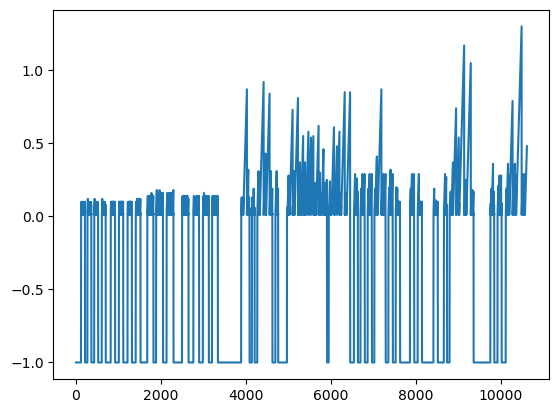

In [6]:
plt.figure()
plt.plot(L)
plt.show()

<AxesSubplot:xlabel='Time'>

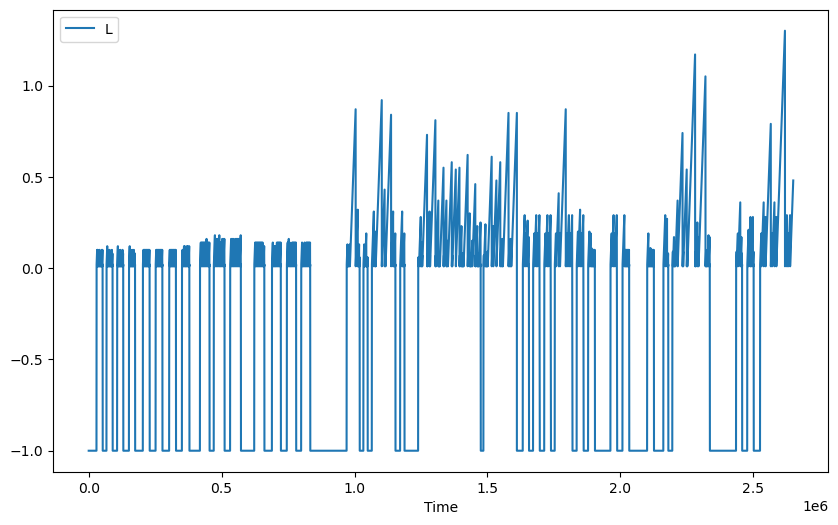

In [7]:
import pandas as pd

df = pd.DataFrame()
df['Time']=TT
df['L']=L


df.plot(x="Time", legend=True, figsize=(10,6))


<AxesSubplot:xlabel='Time'>

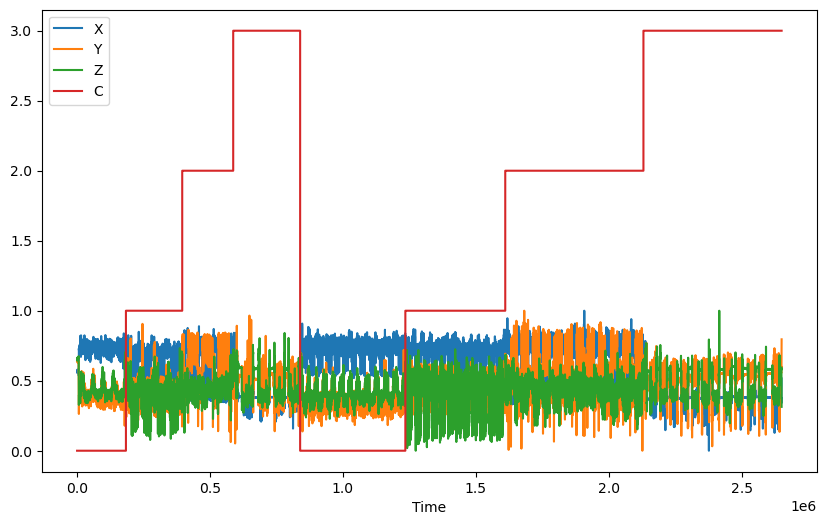

In [8]:
df = pd.DataFrame()
df['Time']=TT
df['X']=X
df['Y']=Y
df['Z']=Z
df['C']=C

df.plot(x="Time", legend=True, figsize=(10,6))

In [9]:
from keras.utils import to_categorical
C0=to_categorical(C)

In [10]:
XYZ=[]
Yclass=[]
for i in range(0,N):
    if(L[i]<0):
        continue
    print("i:",i)
    x1=[]
    y1=[]
    z1=[]
    for it in winIndSize:
        x1.append(X[i+it])
        y1.append(Y[i+it])
        z1.append(Z[i+it])
    xi=[]
    print("x1",x1)
    xi.append(x1)
    xi.append(y1)
    xi.append(z1)
    XYZ.append(np.transpose(xi))
    Yclass.append(C0[i])
XYZ=np.array(XYZ)
Yclass=np.array(Yclass)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



x1 [0.37794169301018615, 0.3793466807165437, 0.37934668071654376, 0.3804004214963119, 0.3814541622760801, 0.3793466807165437, 0.378644186863365, 0.3804004214963119, 0.37934668071654376, 0.3804004214963119, 0.3814541622760801, 0.3782929399367756, 0.3793466807165437, 0.3804004214963119, 0.38004917456972254, 0.3793466807165437, 0.378644186863365, 0.3782929399367756, 0.38075166842290126, 0.3804004214963119, 0.37934668071654376, 0.3793466807165437, 0.38075166842290126, 0.3804004214963119, 0.38004917456972254, 0.3804004214963119, 0.38004917456972254, 0.3804004214963119, 0.38004917456972254, 0.3793466807165437, 0.3793466807165437, 0.3782929399367756, 0.38918159466104674, 0.4457323498419389, 0.49244819107832805, 0.5258166491043204, 0.5282753775904461, 0.5068493150684932, 0.3976115208991921, 0.3814541622760801]
i: 10472
x1 [0.3793466807165437, 0.37934668071654376, 0.3804004214963119, 0.3814541622760801, 0.3793466807165437, 0.378644186863365, 0.3804004214963119, 0.37934668071654376, 0.3804004214

In [11]:
print(XYZ.shape)
print(Yclass.shape)   

(6325, 40, 3)
(6325, 4)


TRAIN: [   0    1    2 ... 6321 6323 6324] TEST: [  21   27   29   33   61   64   72   77   88  110  135  170  173  189
  192  194  215  229  242  287  307  312  328  330  334  336  356  382
  385  395  396  413  417  419  422  448  450  469  470  475  478  491
  492  494  506  507  508  509  518  521  526  533  534  537  582  591
  600  610  652  653  679  694  698  699  707  714  719  720  722  724
  725  733  758  761  800  803  816  841  847  865  902  925  928  932
  950  952  960  976 1008 1012 1020 1027 1030 1048 1054 1060 1072 1077
 1097 1115 1121 1124 1126 1132 1145 1150 1167 1172 1177 1179 1183 1189
 1192 1201 1206 1210 1213 1216 1218 1219 1236 1244 1246 1250 1252 1263
 1277 1281 1283 1298 1301 1317 1330 1332 1333 1334 1338 1340 1341 1347
 1353 1373 1377 1394 1404 1408 1438 1447 1488 1500 1509 1524 1525 1565
 1588 1609 1625 1630 1647 1660 1663 1664 1665 1671 1672 1673 1685 1724
 1726 1731 1732 1738 1740 1743 1762 1770 1786 1790 1795 1802 1809 1820
 1824 1834 1835 1842 1848 18

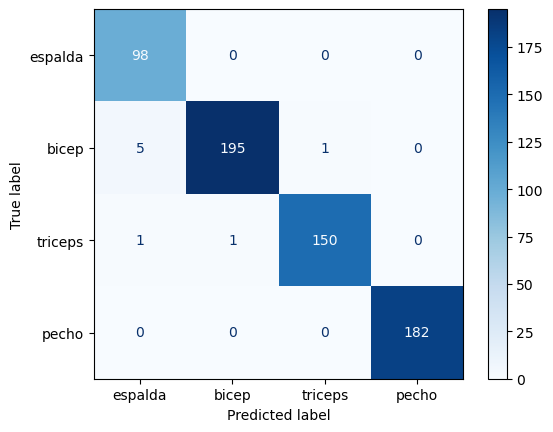

TRAIN: [   0    2    3 ... 6322 6323 6324] TEST: [   1    9   26   30   36   42   43   53   79   87   90   96   97  113
  115  120  121  122  133  146  177  182  184  218  224  227  232  239
  277  294  306  310  316  329  332  338  351  353  355  360  362  368
  369  370  371  377  387  403  412  420  433  437  442  465  468  500
  512  515  551  571  585  598  606  619  620  625  629  661  706  715
  723  737  748  759  769  795  812  834  850  855  860  870  871  872
  879  880  891  893  915  919  921  922  930  944  945  953  972  986
  995  996  998 1002 1003 1022 1024 1039 1044 1055 1056 1064 1075 1082
 1085 1086 1104 1114 1117 1120 1129 1147 1164 1170 1186 1191 1194 1197
 1202 1221 1224 1237 1243 1265 1266 1272 1282 1296 1307 1312 1329 1358
 1363 1365 1366 1368 1375 1378 1379 1389 1402 1412 1413 1427 1432 1433
 1459 1480 1491 1517 1538 1548 1584 1589 1604 1610 1631 1654 1659 1667
 1677 1717 1725 1728 1745 1759 1774 1794 1806 1807 1813 1826 1858 1860
 1861 1864 1879 1880 1888 18

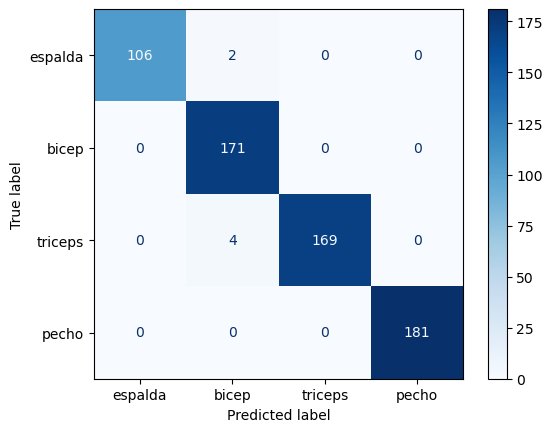

TRAIN: [   0    1    2 ... 6322 6323 6324] TEST: [   6   11   14   25   32   46   56   58   62   74   76   91   94  100
  101  118  126  142  147  168  178  180  193  211  226  236  245  246
  252  253  258  263  322  324  340  342  348  363  388  389  402  404
  410  411  414  446  449  451  453  459  466  471  539  549  559  560
  568  578  579  580  594  603  646  663  666  673  674  677  680  683
  684  700  726  727  753  755  756  770  772  788  802  818  825  827
  830  856  873  889  899  905  907  910  913  916  920  927  963  989
 1010 1078 1079 1088 1095 1111 1140 1141 1155 1161 1185 1196 1199 1204
 1205 1223 1234 1235 1249 1264 1267 1270 1271 1289 1294 1302 1304 1305
 1308 1310 1345 1362 1372 1380 1384 1390 1396 1397 1400 1403 1416 1431
 1436 1441 1442 1450 1452 1455 1456 1463 1482 1487 1490 1503 1504 1515
 1518 1537 1539 1553 1554 1558 1560 1566 1567 1572 1597 1599 1606 1622
 1637 1641 1650 1655 1691 1706 1716 1718 1720 1747 1752 1753 1755 1756
 1765 1777 1779 1781 1800 18

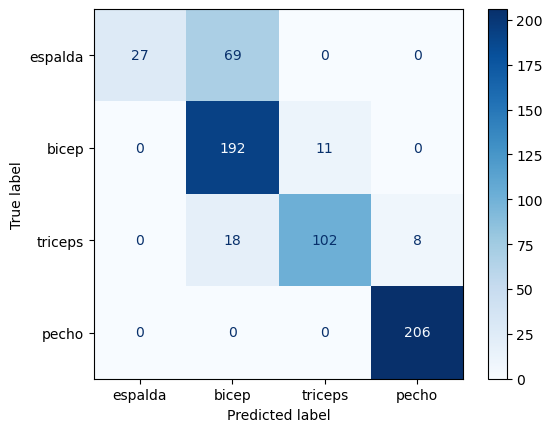

TRAIN: [   0    1    2 ... 6321 6322 6323] TEST: [  17   39   47   50   60   80   82   89   92   99  104  108  117  127
  132  139  140  153  154  155  159  172  187  197  198  206  207  209
  210  221  234  240  256  261  270  290  301  304  309  318  326  341
  343  354  365  378  379  390  392  405  416  438  439  461  464  480
  483  485  488  497  499  528  543  553  563  566  583  589  596  599
  602  612  617  618  631  636  697  703  711  739  760  763  797  804
  809  810  820  836  838  842  858  859  863  867  868  876  878  884
  886  896  904  906  909  924  926  941  947  951  965  971  975  979
  981  984  985  997  999 1014 1033 1035 1036 1046 1057 1061 1081 1083
 1105 1133 1136 1143 1148 1152 1163 1175 1176 1181 1182 1184 1198 1209
 1212 1220 1227 1241 1245 1255 1274 1278 1280 1285 1287 1291 1303 1313
 1316 1342 1348 1374 1392 1399 1411 1414 1415 1426 1437 1451 1457 1461
 1466 1486 1495 1506 1510 1512 1526 1540 1551 1556 1557 1561 1578 1579
 1591 1596 1603 1626 1657 16

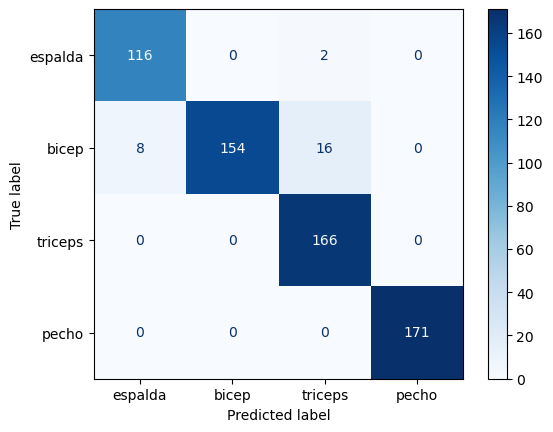

TRAIN: [   0    1    2 ... 6322 6323 6324] TEST: [  15   16   19   49   78  102  103  141  149  156  160  162  171  179
  186  202  212  214  216  217  237  247  259  272  292  320  325  331
  335  344  361  372  374  375  423  426  427  444  452  455  460  472
  501  504  511  514  535  540  572  573  574  586  613  615  626  638
  640  651  654  659  664  665  682  693  702  705  721  728  729  732
  736  740  765  781  784  786  791  807  819  832  835  840  851  857
  862  869  885  892  900  901  937  949  955  957  966  967  973  977
  982  988  992 1007 1016 1017 1023 1031 1038 1042 1062 1063 1065 1069
 1074 1099 1100 1102 1118 1119 1122 1134 1142 1149 1154 1159 1160 1162
 1207 1231 1233 1284 1292 1293 1297 1309 1335 1344 1355 1359 1388 1395
 1398 1407 1453 1464 1471 1472 1474 1511 1514 1530 1533 1541 1543 1552
 1583 1586 1594 1601 1605 1611 1613 1614 1632 1640 1648 1662 1675 1694
 1696 1705 1709 1711 1722 1727 1734 1735 1751 1760 1769 1772 1797 1815
 1817 1819 1828 1836 1838 18

In [ ]:
from tensorflow import keras

from tensorflow.keras import layers
from keras.optimizers import Adam
from keras.layers import MaxPooling2D,Activation, Dense

from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, Conv2D, ReLU, BatchNormalization,\
                                    Add, AveragePooling2D, Flatten, Dense,Dropout,LSTM,TimeDistributed,MaxPooling1D
from tensorflow.keras.models import Model

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from keras.losses import mean_squared_error

from keras import backend as K

from sklearn.model_selection import KFold


#Dividimos los datos en K fold para cross validation
#kf = KFold(n_splits=10,shuffle=True)
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(XYZ)

Y_pred_total=np.array([])
Y_val_total=np.array([])

for train_index, test_index in kf.split(XYZ):
    #Datos de train y test
    print("TRAIN:", train_index, "TEST:", test_index)
    XYZ_train, XYZ_test = XYZ[train_index], XYZ[test_index]
    Yclass_train, Yclass_test = Yclass[train_index], Yclass[test_index]

    
    model = keras.Sequential()

    model.add(Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(XYZ.shape[1],XYZ.shape[2])))
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

    model.add(Dropout(0.25))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.25))
    model.add(LSTM(256))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Dense(512))
    model.add(Dense(4, activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
    model.summary()



    history = model.fit(XYZ_train , Yclass_train,
                    batch_size=64,
            validation_data=(XYZ_test , Yclass_test),
            epochs=5)
    
    

    
    y_pred = model.predict(XYZ_test).argmax(axis=1)
    Yclass_test=Yclass_test.argmax(axis=1)
    print(y_pred)
    print(Yclass_test)

    try:
        cm = confusion_matrix(Yclass_test, y_pred) 
        print(cm)
        print('Classification Report SCENE ')
        print(classification_report(Yclass_test, y_pred,target_names=name_classes))

        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=name_classes)

        disp.plot(cmap=plt.cm.Blues)
        plt.show()
    except:
        print("Not same clases!!")



    Y_pred_total=np.concatenate((Y_pred_total,y_pred))
    Y_val_total=np.concatenate((Y_val_total,Yclass_test))

In [ ]:
print(Y_pred_total)
print(Y_val_total)

cm = confusion_matrix(Y_val_total, Y_pred_total) 
print(cm)
print('Classification Report TOTAL')
print(classification_report(Y_val_total, Y_pred_total, target_names=name_classes))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=name_classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()